# Class 16 – Decision Trees and Random Forest
**Duration:** 2 Hours

**Objective:** Understand how Decision Trees and Random Forest work, how they are used for classification tasks, and how Random Forest helps in reducing overfitting.

## 1. Introduction to Decision Trees

Decision Trees are machine learning models used for both classification and regression.
They work like a flowchart: based on the values of features, the data is split into smaller and smaller groups.

### Splitting Criteria
- **Gini Impurity**: Measures the likelihood of an incorrect classification.
- **Entropy**: Measures disorder; used in ID3 algorithm.
- **Information Gain**: The reduction in entropy after a split.

### Overfitting in Decision Trees
- When a tree grows too deep, it may perfectly fit the training data but fail on new data.

### Pruning
- **Pre-Pruning**: Stop growing the tree beyond a certain depth.
- **Post-Pruning**: Grow the tree fully, then cut back nodes that don't improve accuracy on validation data.

## 2. Introduction to Random Forest

Random Forest is an ensemble method — it builds many decision trees and combines their predictions.

### Key Concepts
- **Bagging (Bootstrap Aggregating)**: Each tree is trained on a random sample of the data.
- **Voting**: For classification, predictions are based on majority vote.
- Helps to reduce overfitting by combining many weak learners (trees).

## 3. Building a Decision Tree

We will use the famous **Iris dataset** to predict the species of a flower based on petal and sepal measurements.

In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**Explanation:**
- `pandas` is used for data handling.
- `train_test_split` helps us split the dataset.
- `DecisionTreeClassifier` is our model.
- `confusion_matrix`, `accuracy_score`, and `classification_report` help us evaluate the model.
- `seaborn` and `matplotlib` help us visualize results.

In [2]:
# Step 2: Load Dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We load the Iris dataset directly from an online source. It contains flower features and their species.

In [3]:
# Step 3: Preprocess Data
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [4]:
# Step 4: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 5: Train the Decision Tree Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [6]:
# Step 6: Make Predictions
y_pred = model.predict(X_test)

In [7]:
# Step 7: Evaluate the Model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



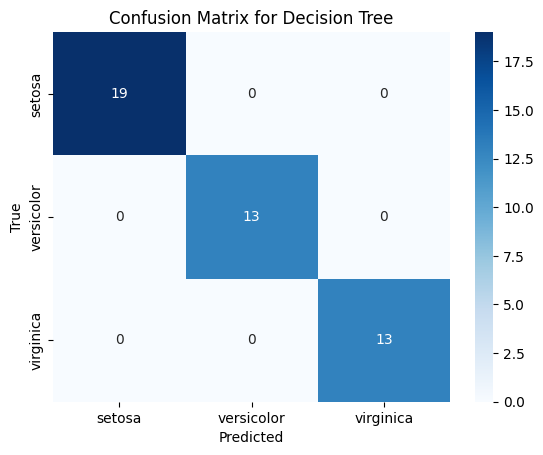

In [15]:
# Step 8: Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

## 4. Building a Random Forest

Now we will use the same dataset to build a **Random Forest model**.

In [8]:
# Step 1: Import Library
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Step 2: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Step 3: Make Predictions
rf_y_pred = rf_model.predict(X_test)

In [11]:
# Step 4: Evaluate the Model
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy: ", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



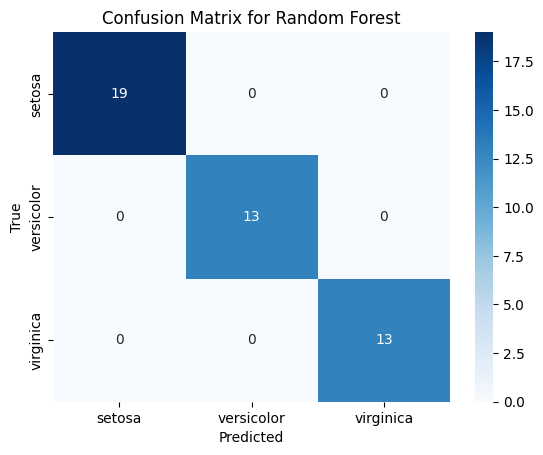

In [12]:
# Step 5: Plot Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

## 5. Comparison and Wrap-Up

| Model | Pros | Cons |
|-------|------|------|
| **Decision Tree** | Easy to visualize and interpret | Prone to overfitting |
| **Random Forest** | More robust and accurate | Less interpretable |

### Key Takeaways
- Decision Trees are powerful but can overfit.
- Random Forest uses multiple trees to reduce overfitting and improve generalization.

### Activity:
- Try changing the depth of the tree and see how it affects performance.
- Reduce the number of trees in the random forest and observe accuracy changes.